In [103]:
import numpy as np
from matplotlib import pyplot as plt
import functions as func
import sympy as sym
from sympy.utilities import lambdify
import pandas as pd
from IPython import display


sym.init_printing(use_unicode=True)

# ***Derivacion***

### **Ejercicio 5**

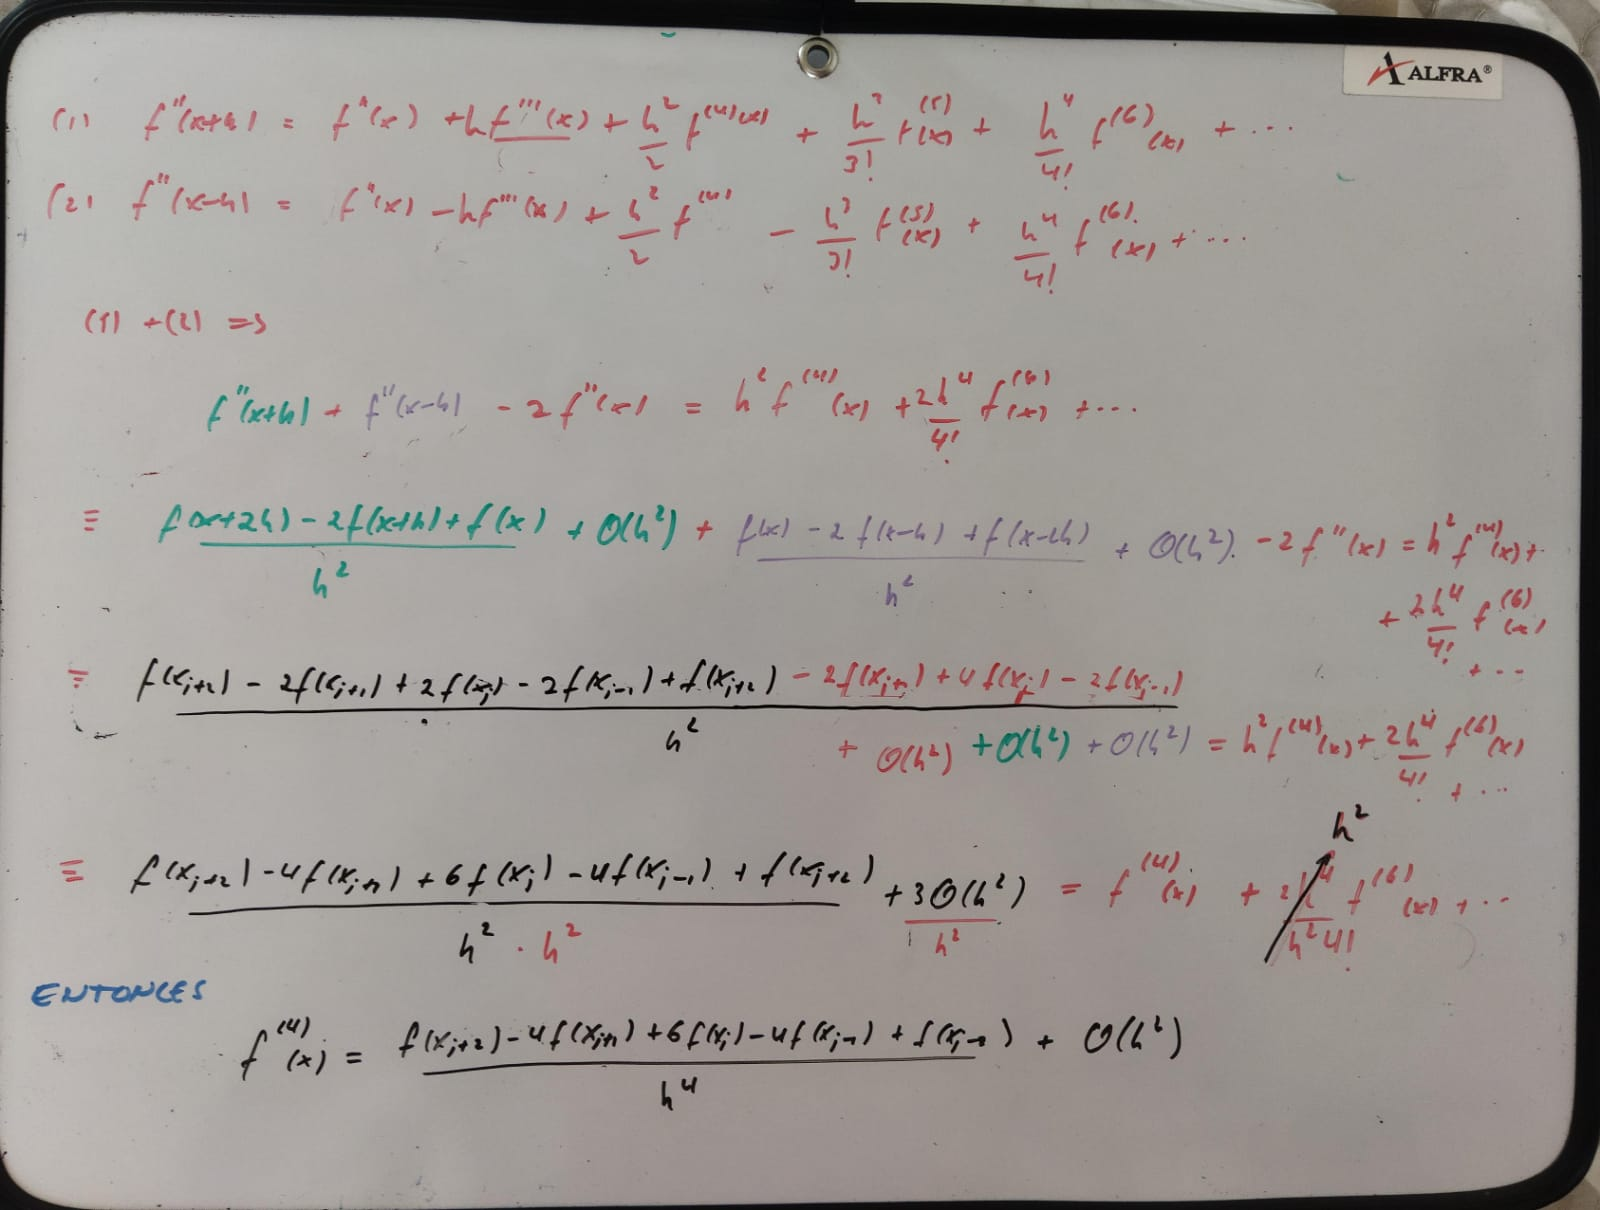

In [110]:
display.Image("ejercicio5_derivacion.jpeg",width=550)

### **Ejercicio 8**

### (a)

Inteporlación de lagrange para el soporte $\Omega=\{(x_0,f(x_0),(x_1,f(x_1),(x_2,f(x_2)\}$ viene dada por 

$$
p_n(x) = \sum_{i=0}^2 f(x_i)\mathcal{L}_i(x)
$$

donde $\mathcal{L}_i = \prod_{j=0, j\neq i}^2\frac{x-x_j}{x_i-x_j}$. Tenemos entonces que 

$\mathcal{L}_0 = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}$

$\mathcal{L}_1 = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}$

$\mathcal{L}_2 = \frac{(x-x_0)(x-x_1)}{(x_2-x_1)(x_2-x_1)}$

Asumiendo que los $x_i$ están equiespaciados:

$\mathcal{L}_0 = \frac{(x-x_1)(x-x_2)}{2h^2}$

$\mathcal{L}_1 = \frac{(x-x_0)(x-x_2)}{-h^2}$

$\mathcal{L}_2 = \frac{(x-x_0)(x-x_1)}{2h^2}$

Entonces

$p_n(x) = \frac{f(x_0)(x-x_1)(x-x_2)-2f(x_1)(x-x_0)(x-x_2)+f(x_2)(x-x_0)(x-x_1)}{2h^2}$



### (b)


$p_n'(x) = \frac{((x-x_2)+(x-x_1))f(x_0)+((x-x_0)+(x-x_2)f(x_1)+((x-x_0)+(x-x_1)f(x_2)}{2h^2}$

Entonces $p'_n(x_0) = \frac{-3f(x)+4f(x+h)-f(x+2h)}{2h}$


In [162]:
# Para punto c,d e
h = 0.01
x = np.array(np.linspace(0.1,1.1))


def funcion_comp(x):
    return np.sqrt(np.tan(x))

### (c)

In [163]:
#Usamos la expresion del punto (b)
def df_prog(f,x,h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

In [156]:
y_prog = df_prog(funcion_comp,x,h)

Text(0.5, 1.0, 'Derivada progresiva de orden $\\mathcal{O}(h^2)$')

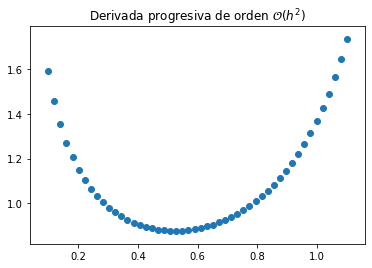

In [164]:
plt.scatter(x,y_prog)
plt.title(r"Derivada progresiva de orden $\mathcal{O}(h^2)$")

### (d)

Tenemos $p_n(x) = \frac{f(x_0)(x-x_1)(x-x_2)-2f(x_1)(x-x_0)(x-x_2)+f(x_2)(x-x_0)(x-x_1)}{2h^2}$

Evaluando $p_n(x)$ en $x_0$, tenemos $p_n(x_0) = f(x_0)$

In [165]:
y_central = func.DerivadaCentral(funcion_comp,x,h)

Text(0.5, 1.0, 'Derivada central de orden $\\mathcal{O}(h^2)$')

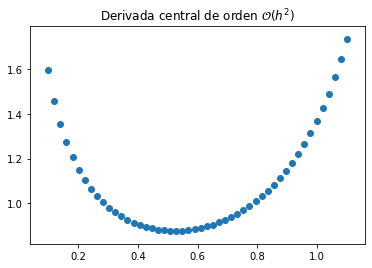

In [166]:
plt.scatter(x,y_central)
plt.title(r"Derivada central de orden $\mathcal{O}(h^2)$")

### (e)

$Si f(x) = \sqrt(\tan(x))$ entonces su derivada $f'(x)$ es $\frac{1}{2}\frac{\sec^2(x)}{\sqrt(\tan(x)}$ usando la regla de la cadena y teniendo en cuenta que $\frac{d(\tan(x))}{dx} = \sec^2(x)$

In [169]:
def df(f,x):
    return 0.5*(1/f(x))*((1/np.cos(x))**2)

In [170]:
y = df(funcion_comp,x)

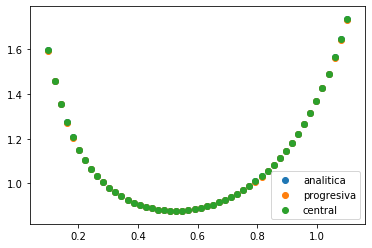

In [171]:
fig,ax = plt.subplots(1,1)

ax.scatter(x,y,label="analitica")
ax.scatter(x,y_prog,label="progresiva")
ax.scatter(x,y_central,label="central")
ax.legend()

Text(0.5, 1.0, 'Errores nodales')

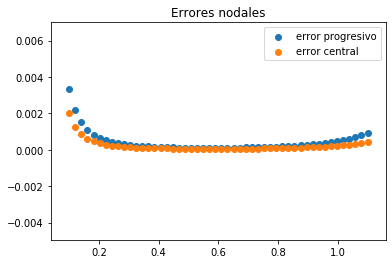

In [188]:
#error nodal
err_progresivo = np.abs(y_prog-y)
err_central = np.abs(y_central-y)

fig, ax = plt.subplots(1,1)
ax.scatter(x,err_progresivo,label = "error progresivo")
ax.scatter(x,err_central,label = "error central")
ax.legend()
ax.set_ylim(np.min(err_central)-0.005,np.max(err_central)+0.005)
plt.title("Errores nodales")

¿Tienen efectivamente el mismo orden de precision ambos resultados?

El orden de precisión es mayor para la derivada central

# ***Raices Polinomios***

### **Ejercicio 3**

Calcular las raices de $f(x) = 3x^5+5x^4-x^3$ 

Con Newton Raphson

In [9]:
def polinomio(x):
    return 3*(x**5)+(5*(x**4))-(x**3)

In [10]:
#x = (-5+np.sqrt(37))/6
N = 20
x = np.linspace(-2,2,N)
y = polinomio(x)

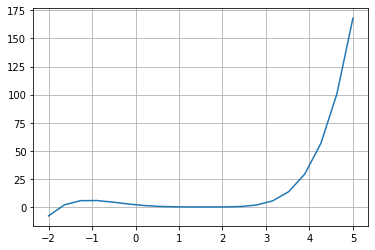

In [43]:
plt.plot(x,y)
plt.grid()

In [72]:
#Derivada central
def Derivative(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

In [79]:
def GetNewtonMethod(f,df,xn,itmax=100,precision=1e-8):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            # Criterio de parada
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Division por cero')
            
        xn = xn1
        it += 1
        
   # print('Raiz',xn,it)
    
    if it == itmax:
        return False
    else:
        return xn



In [86]:
def GetAllRoots(x, tolerancia=5):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonMethod(polinomio,Derivative,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
    
    return Roots

In [87]:
x = np.linspace(-2.,0.4,10)
Roots = GetAllRoots(x)
Roots

array([-1.84713, -0.     ,  0.18046])

----

In [30]:
def biseccion(a,b,f):
    if not f(a)*f(b)<0:
        print("f(a) y f(b) deben tener signos opuestos")
        return None
    #error
    e = 1e-2
    
    centinela = True
    while centinela:
        c = (b+a)/2
        if np.abs(f(c))<e:
            raiz = c
            centinela=False
        
        if f(c)*f(a)<0:
            b = c
        else:
            a = c
    
    return raiz
        
        

In [31]:
a = -2
b = -0.5
biseccion(-2,-0.5, polinomio)

# ***Interpolacion de lagrange***

### **Ejercicio 4**

In [117]:
data = pd.read_csv("Parabolico.csv")
X = data.X
Y = data.Y

In [118]:
data

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


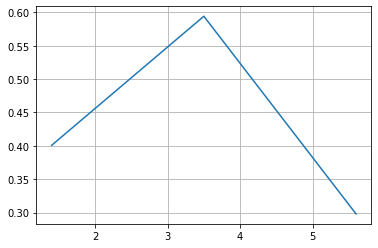

In [119]:
plt.plot(data.X,data.Y)
plt.grid()

In [120]:
def Lagrange(x,X,i):
    
    L = 1
    
    for j in range(X.shape[0]):
        if i != j:
            L *= (x - X[j])/(X[i]-X[j])
            
    return L

In [121]:
def Interpolate(x,X,Y):
    
    Poly = 0
    
    for i in range(X.shape[0]):
        Poly += Lagrange(x,X,i)*Y[i]
        
    return Poly

In [122]:
x = np.linspace(0,6.,50)
y = Interpolate(x,X,Y)

No handles with labels found to put in legend.


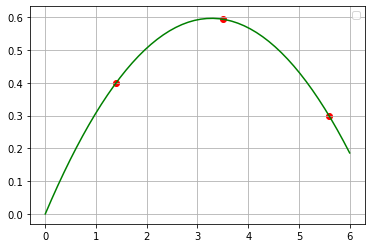

In [123]:
plt.plot(x,y,color='g')
plt.scatter(X,Y,color='r',marker='o')
plt.legend()
plt.grid()

In [124]:
_x = sym.Symbol('x',real=True)
f = Interpolate(_x,X,Y)
f = sym.simplify(f)
f

Para encontrar la velocidad inicial usamos

$y = x\tan\theta-\frac{9.8x^2}{2v^2\cos^2(\theta)}$

$\equiv 1/v^2 =  (x\tan(\theta)-y)\cdot 2\cos^2(\theta)/(x^2\cdot g) $

In [125]:
def velocidad_inicial():
    theta = np.arctan(0.363970234266202)
    v2 = ((X[0]**2)*9.8)/((X[0]*np.tan(theta)-Y[0])*2*np.cos(theta)**2)
    
    return(np.sqrt(v2),np.degrees(theta))
    
    

In [128]:
print("La velocidad inicial y el ángulo son")
print(np.round(velocidad_inicial(),2))

La velocidad inicial y el ángulo son
[10. 20.]
